# Spaceship Titanic Predictions

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

---

## About

The **Spaceship Titanic** is a fictional interstellar voyage where an anomaly in spacetime has caused passengers to be mysteriously transported to an alternate dimension.

You are provided with personal records of the passengers, and the goal is to **predict whether each passenger was transported** based on these attributes. The data was partially recovered from the ship's damaged computer system.

This project simulates a **real-world classification problem** and is ideal for building an **end-to-end MLOps pipeline** from data ingestion to deployment.

---

## 1) Problem Statement

After the Spaceship Titanic’s collision with the anomaly, the transport records were corrupted. You are tasked with creating a machine learning model to predict whether a passenger was **Transported** to an alternate dimension.

This model can help the ship's investigation committee understand what factors contributed to the disappearance and automate future anomaly responses.

- **Objective**: Predict the `Transported` (True/False) status using passenger data.
- **Type**: Binary Classification Problem

---

## 2) Data Collection

The dataset is provided in three CSV files:

- `train.csv` – Contains training data 
- `test.csv` – Used for final predictions 
- `sample_submission.csv` – Sample submission format for Kaggle

Each row represents a unique passenger with features such as:

- Personal information: `HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `Age`, `VIP`, `Name`
- Spending features: `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`
- Target column: `Transported` (only in train data)

---

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn, math

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Import the CSV Data as Pandas DataFrame

In [86]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [87]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


#### Show Top 5 Records

In [88]:

# Set placeholder for target in test set
test_df["Transported"] = None  # Use None or np.nan (import numpy as np)

# Combine datasets
df = pd.concat([train_df, test_df], axis=0).set_index("PassengerId")
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [89]:
df = df.replace(['nan', 'NaN', 'None', ''], 'null')
df


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,None
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,None
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,None


#### Shape of dataset

In [90]:
df.shape

(12970, 13)

#### Summary of dataset

In [91]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0001_01 to 9277_01
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Name          12676 non-null  object 
 12  Transported   8693 non-null   object 
dtypes: float64(6), object(7)
memory usage: 1.4+ MB


In [93]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

We have 7 categorical features : ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']


In [94]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

HomePlanet
Earth     54.131840
Europa    24.704305
Mars      21.163854
Name: proportion, dtype: float64
---------------------------
CryoSleep
False    63.815166
True     36.184834
Name: proportion, dtype: float64
---------------------------
Cabin
G/734/S     0.063136
G/160/P     0.063136
D/176/S     0.055244
G/1476/S    0.055244
B/201/P     0.055244
              ...   
E/317/P     0.007892
F/1039/P    0.007892
F/1038/P    0.007892
C/158/P     0.007892
G/1498/S    0.007892
Name: proportion, Length: 9825, dtype: float64
---------------------------
Destination
TRAPPIST-1e      69.872401
55 Cancri e      20.801827
PSO J318.5-22     9.325772
Name: proportion, dtype: float64
---------------------------
VIP
False    97.845984
True      2.154016
Name: proportion, dtype: float64
---------------------------
Name
Carry Contrevins      0.015778
Dawne Jacobbinson     0.015778
Gabria Batestonley    0.015778
Loree Wolfernan       0.015778
Gwendy Sykess         0.015778
                        ...   

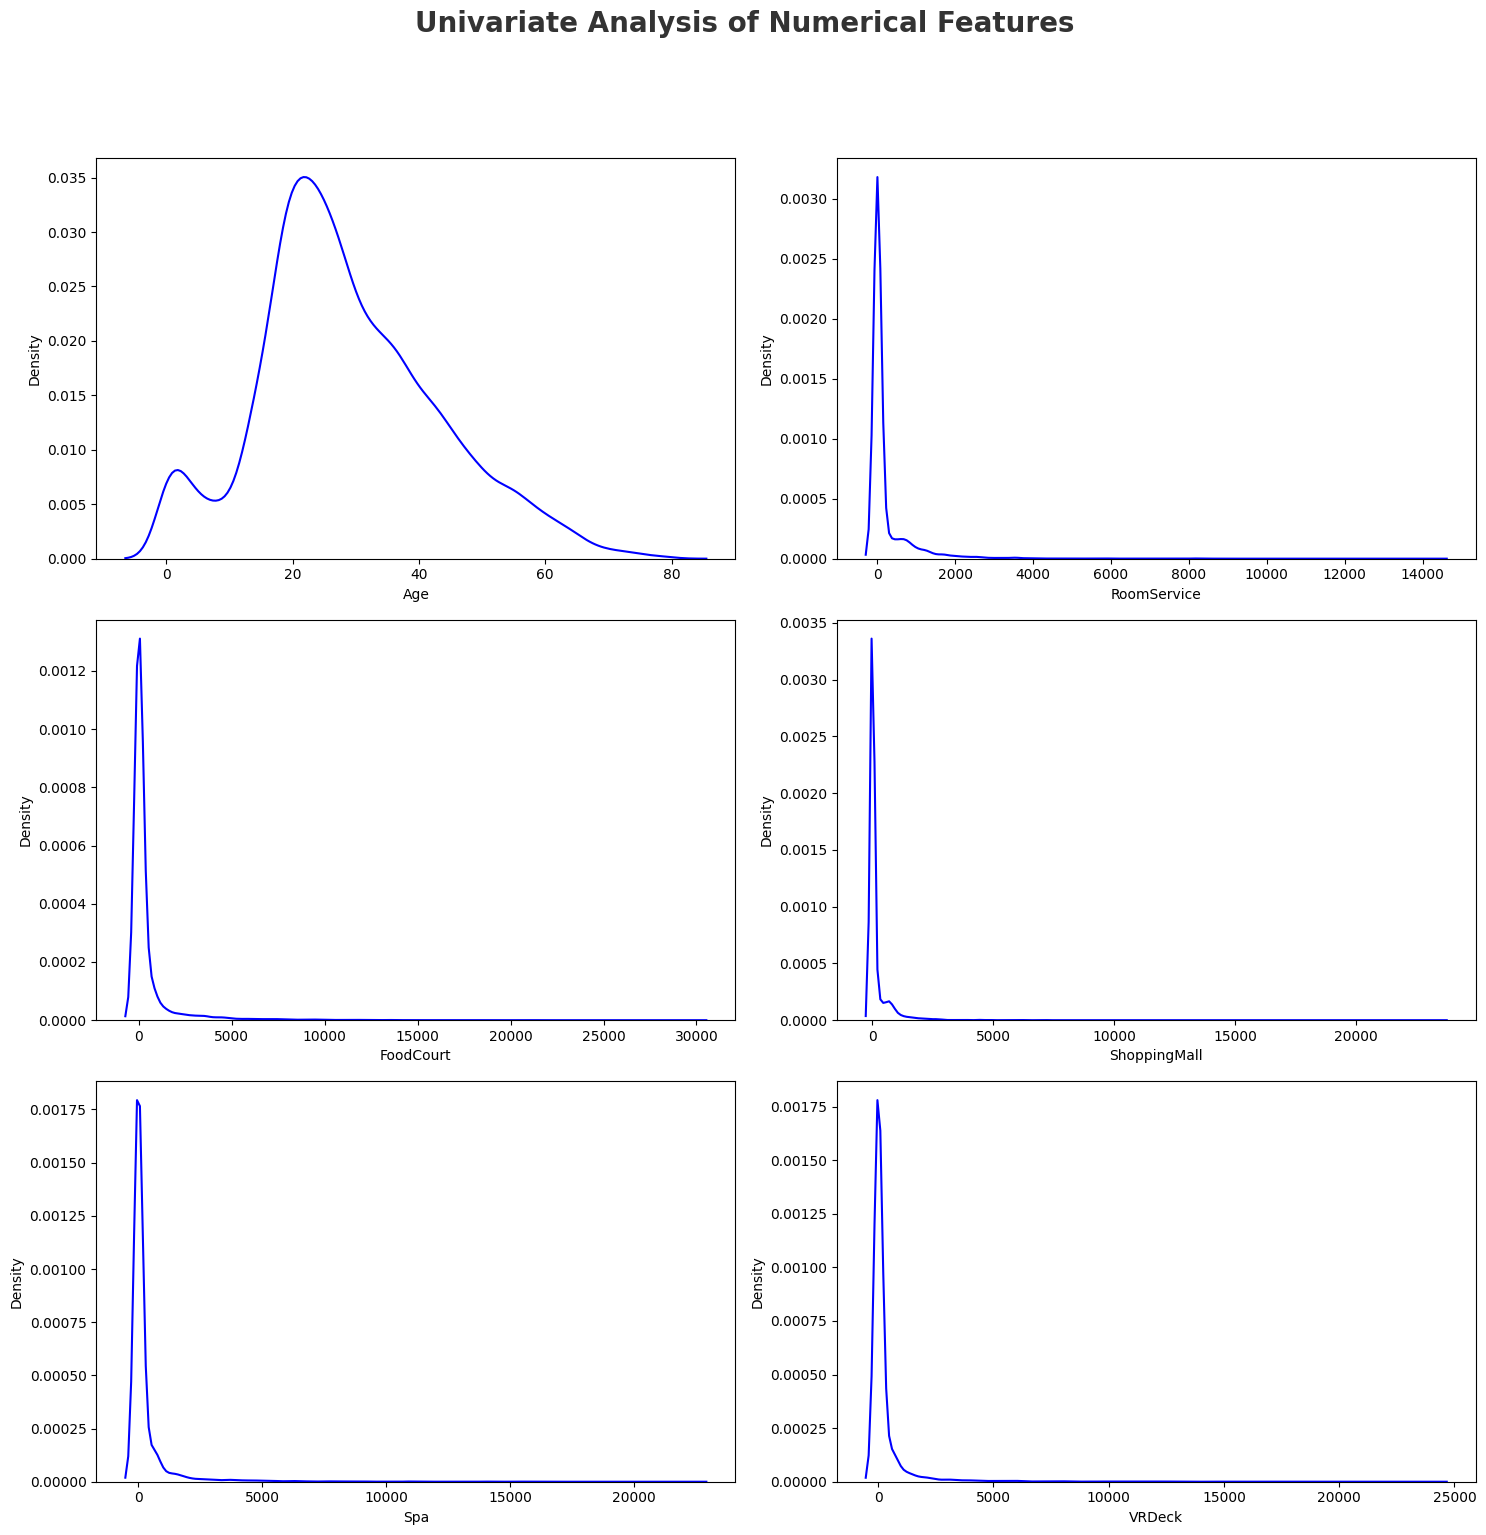

In [95]:
rows = math.ceil(len(numeric_features) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.kdeplot(x=df[feature], ax=axes[i], color='blue')
    axes[i].set_xlabel(feature)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 📈 Insight: Skewness in Numerical Feature Distributions

From the univariate analysis of numerical features, we observe distinct distribution patterns:

- **`Age`** shows a near-normal distribution, peaking around the early 20s, suggesting a concentration of younger passengers. This implies that the majority of travelers were young adults.
- **`RoomService`**, **`FoodCourt`**, **`ShoppingMall`**, **`Spa`**, and **`VRDeck`** all demonstrate **strong right skewness**:
  - Most passengers spent **little to no money** on these services.
  - A **small minority spent excessively**, stretching the distribution tails.

📌 **Implications**:
- These right-skewed features may benefit from **log transformation** during preprocessing to reduce skewness and stabilize variance.
- This distribution may indicate economic disparities or differing service preferences among passengers.



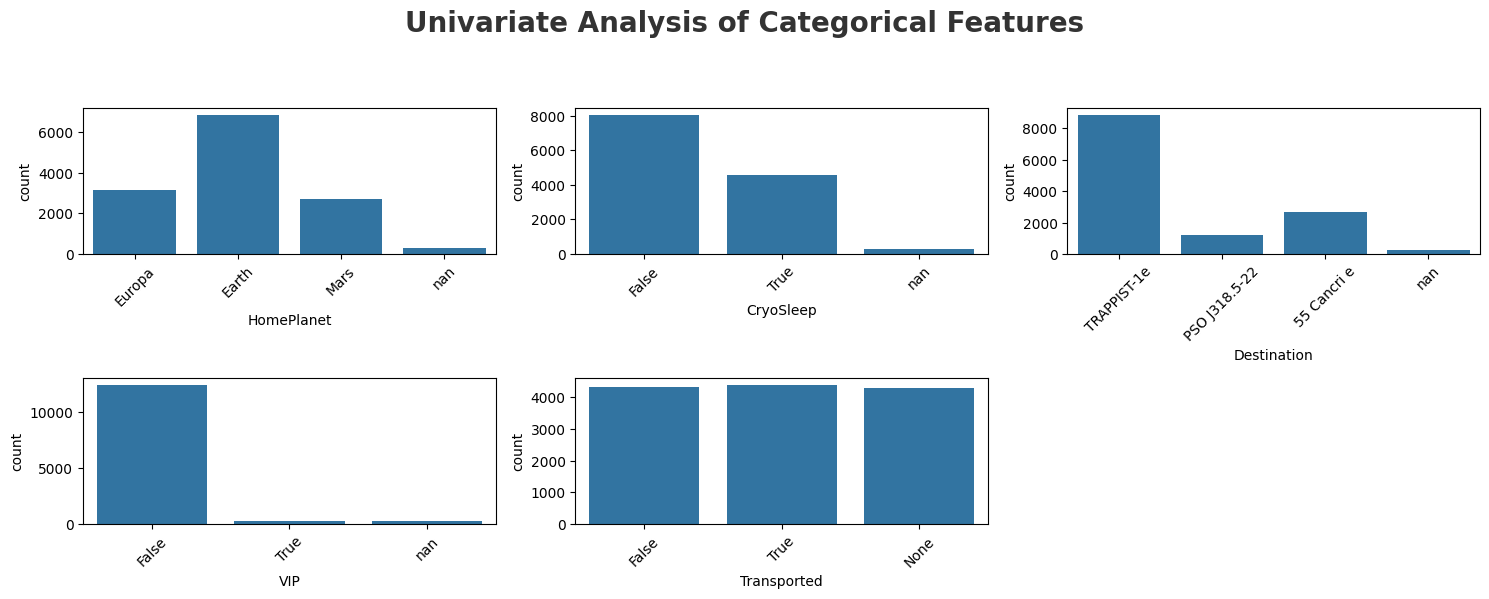

In [96]:
# Safely remove columns from list
categorical_features = [col for col in categorical_features if col not in ['Cabin', 'Name']]

# Convert to string to avoid dtype errors in seaborn (optional but recommended)
df[categorical_features] = df[categorical_features].astype(str)

# Create the plot
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)

# Tight layout should be outside the loop
plt.tight_layout(rect=[0, 0, 1, 0.95])


### 🧩 Insight: Distribution of Categorical Features

The univariate analysis of categorical features reveals several notable patterns:

- **`HomePlanet`**:
  - Most passengers originated from **Earth**, followed by **Europa** and **Mars**.
  - This may reflect Earth being the primary hub or launch point for interstellar travel.

- **`CryoSleep`**:
  - A majority of passengers **were not in cryosleep** (~62%), suggesting that cryosleep was either optional or not preferred by many.

- **`Destination`**:
  - **TRAPPIST-1e** was the most common destination by far, indicating it may have been the main or default route.
  - **55 Cancri e** and **PSO J318.5-22** were far less frequent.

- **`VIP`**:
  - Very few passengers were marked as **VIP**—the vast majority were regular travelers.
  - This points to a heavily economy or standard-class population.

- **`Transported`**:
  - The **target variable** appears **evenly distributed** between `True` and `False`, showing **no significant class imbalance**. This is favorable for classification model training.

These patterns provide early clues about the demographics, service usage, and class dynamics of passengers—useful for feature engineering and downstream modeling tasks.


In [97]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 6 continuous_features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


### Check Multicollinearity in Numerical features

In [98]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### Insights
-  There is no multicollinearity between any variables

### Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e Transported

Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)

In [99]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Transported'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,HomePlanet,Reject Null Hypothesis
1,CryoSleep,Reject Null Hypothesis
2,Destination,Reject Null Hypothesis
3,VIP,Reject Null Hypothesis
4,Transported,Reject Null Hypothesis


### Checking Null Values

In [100]:

df.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           299
Destination       0
Age             270
VIP               0
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Transported       0
dtype: int64

In [101]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


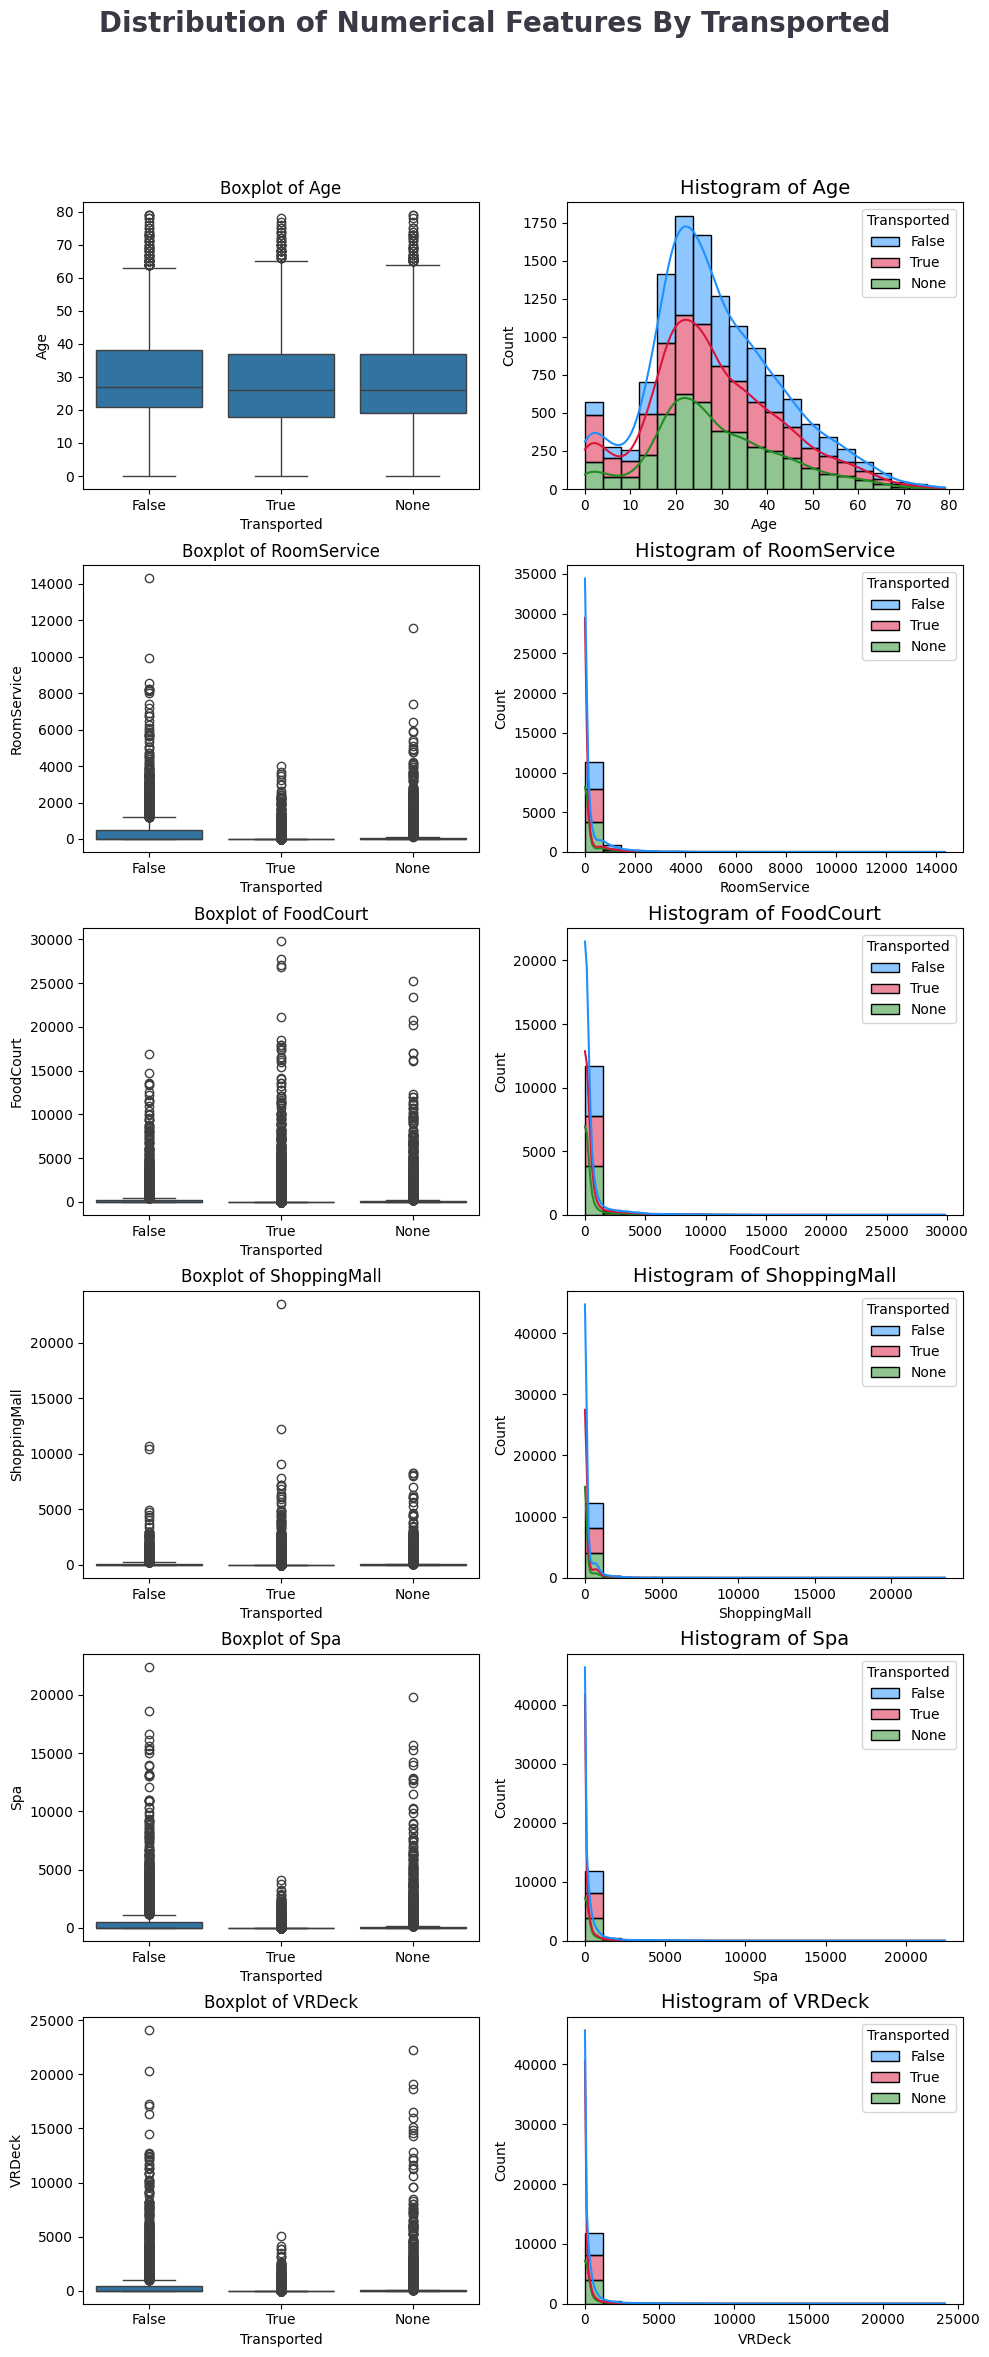

In [102]:
clr1 = ['#1E90FF', '#DC143C', '#228B22']  # Blue, Crimson, ForestGreen  # Add more colors if needed after checking unique values
num_features = len(continues_features)

fig, ax = plt.subplots(num_features, 2, figsize=(10, 4*num_features))
fig.suptitle('Distribution of Numerical Features By Transported', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continues_features):   
    # Boxplot without palette since no hue
    sns.boxplot(data=df, x='Transported', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)

    # Histogram with hue and palette
    sns.histplot(data=df, x=col, hue='Transported', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)


### 🚀 Transport Status Insight Summary

#### Age Distribution
- Younger passengers (teens and children) show a **higher likelihood of being transported**.
- Older passengers (50+) are predominantly **not transported**.

#### Amenities Spending
- **Transported passengers** spend **less** on premium services like:
  - RoomService
  - Spa
  - VRDeck
- **Untransported passengers** show:
  - Higher median spending
  - More outliers in spending

#### FoodCourt & ShoppingMall Trends
- Many passengers recorded **zero spending**, visible as dense clustering.
- Untransported individuals tend to **spend more** in upper quartile ranges.

#### Missing Transport Labels (“None”)
- “None” entries are **scattered**, not aligning with “True” or “False” patterns.
- Might benefit from imputation to preserve data integrity.

---

💡 **Modeling Tip:** Low spending + younger age may be strong predictors of “Transported” status. Consider binning and imputing to enhance model performance.

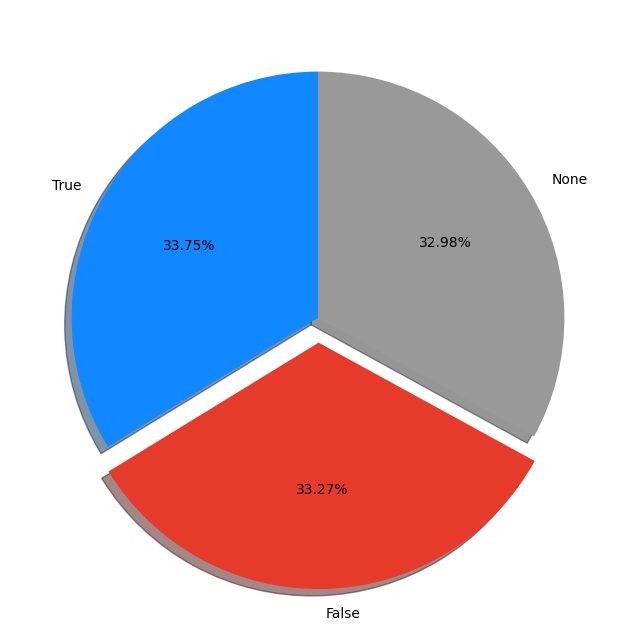

In [103]:
# Get percentage and corresponding labels dynamically
percentage = df.Transported.value_counts(normalize=True) * 100
labels = percentage.index.astype(str).tolist()  # Convert index to list of strings

# Adjust explode and colors accordingly
explode = [0.1 if label == "False" else 0 for label in labels]
colors = ['#1188ff', '#e63a2a', '#999999'][:len(labels)]

# Plot PieChart with Matplotlib
fig, ax = plt.subplots(figsize=(15, 8))
ax.pie(percentage, labels=labels, startangle=90,
       autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()